In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";", index_col=0)
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";", index_col=0)
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";", index_col=0)
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";", index_col=0)

In [4]:
train_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [5]:
test_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,7.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,-1,1.0,0.0,0.0,20.0,0.0,0.0,1.0,21.0,0.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,2,9.0,16.0,11.0,2.0,0.0,0.0,4.0,2.0,0.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,-1,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,6.0,6.0,3.0,-1.0,9.0,2.0,3,2,4
4,1,1.0,21.0,13.0,1.0,0.0,0.0,4.0,1.0,0.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [6]:
general_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,1,2
1,-1,9.0,0.0,21.0,11.0,0.0,0.0,2.0,12.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,-1,9.0,17.0,17.0,10.0,0.0,0.0,1.0,7.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,2,1.0,13.0,13.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,7.0,10.0,11.0,-1.0,9.0,7.0,3,2,4
4,-1,1.0,20.0,14.0,3.0,0.0,0.0,4.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [7]:
customer_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,7.0,3,0,1,4,0,1,1,0,0
1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,0.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,2,4,0,1,1,0,0
3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,7.0,1,0,1,4,0,1,0,1,0
4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,...,3.0,1,0,1,3,0,1,0,0,1


Text(0, 0.5, 'Frequency')

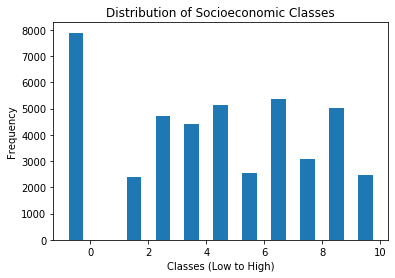

In [14]:
# Histogram of the socioeconmic classification of people in the data
plt.hist(train_data['CAMEO_DEUG_2015'], rwidth=0.5, bins=11)
plt.title("Distribution of Socioeconomic Classes")
plt.xlabel("Classes (Low to High)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Percentage of Responses Responses')

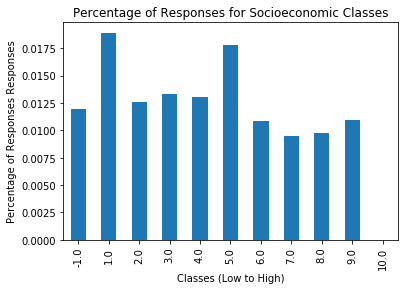

In [17]:
# Graph comparing the socioeconomic status to the response
train_data.groupby('CAMEO_DEUG_2015')['RESPONSE'].mean().plot.bar()
plt.title("Percentage of Responses for Socioeconomic Classes")
plt.xlabel("Classes (Low to High)")
plt.ylabel("Percentage of Responses Responses")

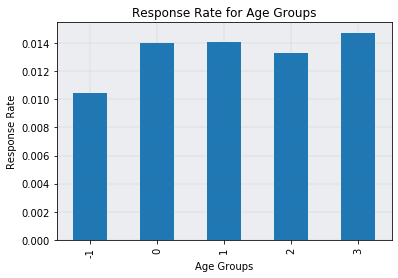

In [7]:
# Graph comparing the age to the response
train_data.groupby('AGER_TYP')['RESPONSE'].mean().plot.bar()
ax = plt.gca()
ax.set_facecolor('#ebedf0')
plt.title("Response Rate for Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Response Rate")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('images/age_responses')

In [13]:
# Graph showing the distribution of age groups
train_data.groupby('AGER_TYP').hist()
ax = plt.gca()
ax.set_facecolor('#ebedf0')
plt.title("Distribution of Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('images/age_distribution')

-1.0     7888
 6.0     5363
 4.0     5131
 8.0     5010
 2.0     4703
 3.0     4423
 7.0     3064
 5.0     2531
 9.0     2460
 1.0     2378
 10.0      11
Name: CAMEO_DEUG_2015, dtype: int64

Text(0, 0.5, 'Total Responses')

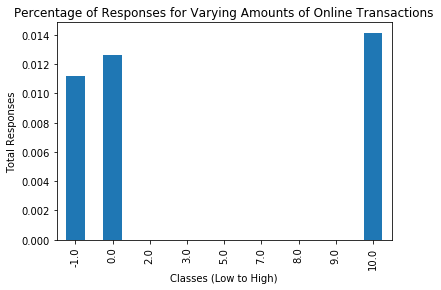

In [14]:
# Graph comparing the online transaction activity to the response
train_data.groupby('D19_BANKEN_ONLINE_QUOTE_12')['RESPONSE'].mean().plot.bar()
plt.title("Percentage of Responses for Varying Amounts of Online Transactions")
plt.xlabel("Classes (Low to High)")
plt.ylabel("Total Responses")

Text(0, 0.5, 'Frequency')

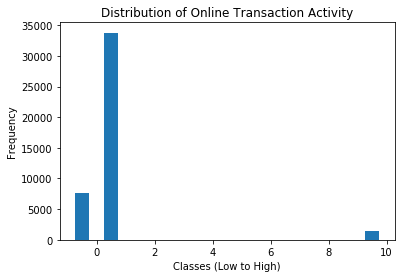

In [7]:
# Histogram of the online transaction activity of people in the data
plt.hist(train_data['D19_BANKEN_ONLINE_QUOTE_12'], rwidth=0.5, bins=11)
plt.title("Distribution of Online Transaction Activity")
plt.xlabel("Classes (Low to High)")
plt.ylabel("Frequency")